In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od

import random
from scipy.stats import norm

### Loading Data in from Kaggle API

f51999f5f297523ab16349d4112bd4ff

In [2]:
od.download("https://www.kaggle.com/datasets/sanjeetsinghnaik/fifa-23-players-dataset")

Skipping, found downloaded files in "./fifa-23-players-dataset" (use force=True to force download)


### Reading in the Kaggle tables from dataset

In [3]:
fifa23data = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/fifa-23-players-dataset/Fifa 23 Players Data.csv')
fifa23= pd.read_csv(fifa23data)

In [4]:
print(fifa23["Nationality"].unique())

['Argentina' 'France' 'Poland' 'Belgium' 'Egypt' 'Germany' 'Portugal'
 'Netherlands' 'England' 'Brazil' 'Korea Republic' 'Slovenia' 'Senegal'
 'Norway' 'Italy' 'Costa Rica' 'Croatia' 'Spain' 'Scotland' 'Austria'
 'Algeria' 'Slovakia' 'Serbia' 'Gabon' 'Czech Republic' 'Hungary'
 'Switzerland' 'Uruguay' 'Ghana' 'Morocco' 'Turkey' 'Montenegro'
 'Cameroon' 'Bosnia and Herzegovina' 'Colombia' 'Canada' "Côte d'Ivoire"
 'Nigeria' 'Denmark' 'Finland' 'Mexico' 'Ukraine' 'United States' 'Sweden'
 'Central African Republic' 'Mali' 'Iran' 'Burkina Faso' 'Armenia' 'Wales'
 'Greece' 'Guinea' 'Japan' 'Jamaica' 'Kosovo' 'Chile' 'Ecuador' 'Libya'
 'Russia' 'Tunisia' 'Northern Ireland' 'Mozambique' 'Peru' 'Togo'
 'Romania' 'Congo DR' 'Angola' 'Albania' 'Georgia' 'Zimbabwe'
 'North Macedonia' 'Venezuela' 'Australia' 'Paraguay'
 'Republic of Ireland' 'Gambia' 'Zambia' 'Saudi Arabia' 'Qatar'
 'New Zealand' 'Iceland' 'Suriname' 'Trinidad and Tobago' 'Israel'
 'Cape Verde Islands' 'Honduras' 'Malta' 'Liberia

In [5]:
WC_2022_teams = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'Iran', 'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'United States', 'Mexico', 'Wales', 'Australia', 'Costa Rica']

In [6]:
fifa23 = fifa23[fifa23["Nationality"].isin(WC_2022_teams)]

In [7]:
print(fifa23["Nationality"].unique())

['Argentina' 'France' 'Poland' 'Belgium' 'Germany' 'Portugal'
 'Netherlands' 'England' 'Brazil' 'Korea Republic' 'Senegal' 'Costa Rica'
 'Croatia' 'Spain' 'Serbia' 'Switzerland' 'Uruguay' 'Ghana' 'Morocco'
 'Cameroon' 'Canada' 'Denmark' 'Mexico' 'United States' 'Iran' 'Wales'
 'Japan' 'Ecuador' 'Tunisia' 'Australia' 'Saudi Arabia' 'Qatar']


In [8]:
## Setting Each Player into a Fixed Position
fifa23["Position"] = np.where(
    fifa23["Best Position"].str.contains(r"^(GK|CB|RB|LB|CB|RWB|LWB)$"), "Defender",
    np.where(
        fifa23["Best Position"].str.contains(r"^(CM|RM|CAM|CDM|LM)$"), "Midfield",
    np.where(
        fifa23["Best Position"].str.contains(r"^(ST|RW|CF|LW|LF|RF)$"), "Attack",
"N/A"
)
)
)

/var/folders/2d/6361wtyx7h51kz0b56dmjd_80000gn/T/ipykernel_11022/4125509986.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fifa23["Best Position"].str.contains(r"^(GK|CB|RB|LB|CB|RWB|LWB)$"), "Defender",
/var/folders/2d/6361wtyx7h51kz0b56dmjd_80000gn/T/ipykernel_11022/4125509986.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fifa23["Best Position"].str.contains(r"^(CM|RM|CAM|CDM|LM)$"), "Midfield",
/var/folders/2d/6361wtyx7h51kz0b56dmjd_80000gn/T/ipykernel_11022/4125509986.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fifa23["Best Position"].str.contains(r"^(ST|RW|CF|LW|LF|RF)$"), "Attack",


In [9]:
fifa23

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,88,91,67,66,67,62,53,62,22,Midfield
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,84,89,67,67,67,63,58,63,21,Attack
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,83,86,67,69,67,64,63,64,22,Attack
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,82,82,82,78,72,78,24,Midfield
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,84,92,70,66,70,66,57,66,21,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18486,O. Awadh,Othman Awadh,49,63,100000,"CDM,CM",CB,Saudi Arabia,https://cdn.sofifa.net/players/270/568/23_60.png,18,...,46,45,49,50,49,49,51,49,16,Defender
18491,T. Maddad,Tariq Maddad,49,58,110000,RW,RW,Saudi Arabia,https://cdn.sofifa.net/players/270/566/23_60.png,21,...,43,49,39,35,39,37,30,37,16,Attack
18519,T. Giraldo,Tomas Giraldo,48,64,120000,CM,CAM,Canada,https://cdn.sofifa.net/players/260/393/23_60.png,19,...,50,50,48,50,48,48,50,48,17,Midfield
18523,M. Furaih,Mohammed Furaih,48,57,110000,"CAM,RW",CAM,Saudi Arabia,https://cdn.sofifa.net/players/271/152/23_60.png,22,...,45,50,39,36,39,37,29,37,17,Midfield


## EA Sports FIFA Ratings

In [10]:
print(fifa23.columns)

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [11]:
fifa23 = fifa23[['Known As','Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'TotalStats', 
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position', 'Club Jersey Number',
       'Skill Moves','International Reputation', 
        'National Team Name','National Team Image Link', 'National Team Position',
       'National Team Jersey Number','Finishing','Short Passing', 'Sprint Speed', 'Stamina', 'Strength', 'Penalties']]

In [12]:
fifa23.head(5)

,Known As,Full Name,Overall,Potential,Value(in Euro),Position,Nationality,Image Link,Age,Height(in cm),...,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Finishing,Short Passing,Sprint Speed,Stamina,Strength,Penalties
0,L. Messi,Lionel Messi,91,91,54000000,Midfield,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,...,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,90,91,76,70,68,75
1,K. Benzema,Karim Benzema,91,91,64000000,Attack,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,...,France,https://cdn.sofifa.net/flags/fr.png,ST,19,92,89,80,82,82,84
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,Attack,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,...,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,94,84,75,76,87,90
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,Midfield,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,...,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,85,93,73,88,74,83
4,K. Mbappé,Kylian Mbappé,91,95,190500000,Attack,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,...,France,https://cdn.sofifa.net/flags/fr.png,ST,10,93,85,97,87,76,80


In [13]:
fifa23['Full Name']= fifa23['Full Name'].astype(str)
cols = ['Full Name']
fifa23[cols] = fifa23[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

/var/folders/2d/6361wtyx7h51kz0b56dmjd_80000gn/T/ipykernel_11022/256333578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa23['Full Name']= fifa23['Full Name'].astype(str)
/var/folders/2d/6361wtyx7h51kz0b56dmjd_80000gn/T/ipykernel_11022/256333578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa23[cols] = fifa23[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))


In [14]:
fifa23transfermarkt2022WC = fifa23

# Creating a Weighted Rating

In [15]:
unique_positions = fifa23transfermarkt2022WC['Position'].unique()

In [16]:
Positions = {}


# Split the DataFrame into multiple DataFrames based on the unique values

for value1 in unique_positions:
    value_df = fifa23transfermarkt2022WC[(fifa23transfermarkt2022WC['Position'] == value1)]
    Positions[value1] = value_df

#sets a dataframe for each variation of country and each position

for key, value in Positions.items():
  # Create a DataFrame with the same name as the key
  globals()[key] = pd.DataFrame(value)

In [17]:
Attack['normalised_rating'] = (0.5 * Attack['Overall'] + 0.3 * Attack["Potential"] + 0.1 * Attack['Value(in Euro)'] + 0.1 * Attack['Wage(in Euro)']) / (0.5 + 0.3 + 0.1 + 0.1)
# Normalize the values between 70 and 95
Attack['normalised_rating'] = (Attack['normalised_rating'] - Attack['normalised_rating'].min()) / (Attack['normalised_rating'].max() - Attack['normalised_rating'].min()) * 25 + 70
# Round the normalised rating
Attack['normalised_rating'] = round(Attack['normalised_rating'], 2)

Midfield['normalised_rating'] = (0.5 * Midfield['Overall'] + 0.3 * Midfield["Potential"] + 0.1 * Midfield['Value(in Euro)'] + 0.1 * Midfield['Wage(in Euro)']) / (0.5 + 0.3 + 0.1 + 0.1)
# Normalize the values between 70 and 95
Midfield['normalised_rating'] = (Midfield['normalised_rating'] - Midfield['normalised_rating'].min()) / (Midfield['normalised_rating'].max() - Midfield['normalised_rating'].min()) * 25 + 70
# Round the normalised rating
Midfield['normalised_rating'] = round(Midfield['normalised_rating'], 2)

Defender['normalised_rating'] = (0.5 * Defender['Overall'] + 0.3 * Defender["Potential"] + 0.1 * Defender['Value(in Euro)'] + 0.1 * Defender['Wage(in Euro)']) / (0.5 + 0.3 + 0.1 + 0.1)
# Normalize the values between 70 and 95
Defender['normalised_rating'] = (Defender['normalised_rating'] - Defender['normalised_rating'].min()) / (Defender['normalised_rating'].max() - Defender['normalised_rating'].min()) * 25 + 70
# Round the normalised rating
Defender['normalised_rating'] = round(Defender['normalised_rating'], 2)

In [18]:
Attack=Attack[["Full Name","normalised_rating","Potential","Value(in Euro)","Wage(in Euro)"]]
Midfield=Midfield[["Full Name","normalised_rating","Potential","Value(in Euro)","Wage(in Euro)"]]
Defender=Defender[["Full Name","normalised_rating","Potential","Value(in Euro)","Wage(in Euro)"]]

In [19]:
Attack = Attack[["Full Name","normalised_rating"]]
Midfield = Midfield[["Full Name","normalised_rating"]]
Defender = Defender[["Full Name","normalised_rating"]]
All_Positions_Normalised = pd.concat([Attack, Midfield, Defender])

In [20]:
fifa23transfermarkt2022WC = fifa23transfermarkt2022WC.merge(All_Positions_Normalised, on="Full Name", suffixes=("_fifa23transfermarkt2022WC", "_All_Positions_Normalised"))
fifa23transfermarkt2022WC = fifa23transfermarkt2022WC.drop_duplicates()

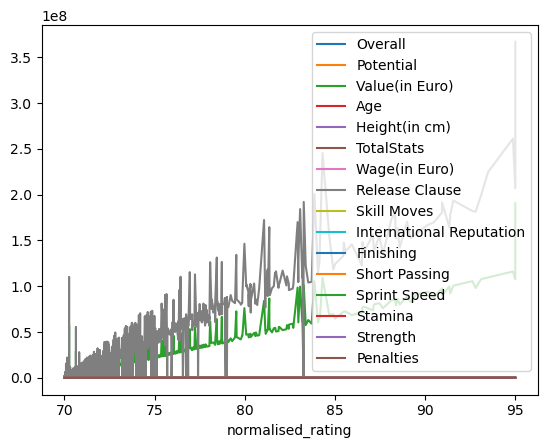

In [21]:
fifa23transfermarkt2022WC = fifa23transfermarkt2022WC.sort_values(by="normalised_rating", ascending=False)

# Plot the normalised_rating for each player
fifa23transfermarkt2022WC.plot(x="normalised_rating", kind="line")

# Show the plot
plt.show()

In [22]:
fifa23transfermarkt2022WC.head(10)

,Known As,Full Name,Overall,Potential,Value(in Euro),Position,Nationality,Image Link,Age,Height(in cm),...,National Team Image Link,National Team Position,National Team Jersey Number,Finishing,Short Passing,Sprint Speed,Stamina,Strength,Penalties,normalised_rating
4,K. Mbappé,Kylian Mbappe,91,95,190500000,Attack,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,...,https://cdn.sofifa.net/flags/fr.png,ST,10,93,85,97,87,76,80,95.00
36,F. de Jong,Frenkie de Jong,87,92,116500000,Midfield,Netherlands,https://cdn.sofifa.net/players/228/702/23_60.png,25,180,...,https://cdn.sofifa.net/flags/nl.png,CDM,21,72,91,83,89,74,53,95.00
18,Rúben Dias,Ruben Santos Gato Alves Dias,88,91,107500000,Defender,Portugal,https://cdn.sofifa.net/players/239/818/23_60.png,25,187,...,https://cdn.sofifa.net/flags/pt.png,CB,4,29,82,67,83,89,45,95.00
69,Pedri,Pedro Gonzalez Lopez,85,93,116000000,Midfield,Spain,https://cdn.sofifa.net/players/251/854/23_60.png,19,174,...,https://cdn.sofifa.net/flags/es.png,CM,10,68,87,76,88,70,53,94.87
70,P. Foden,Phil Foden,85,92,109500000,Midfield,England,https://cdn.sofifa.net/players/237/692/23_60.png,22,171,...,https://cdn.sofifa.net/flags/gb-eng.png,RW,20,79,85,78,83,47,64,93.49
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,Midfield,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,...,https://cdn.sofifa.net/flags/be.png,RF,7,85,93,73,88,74,83,93.10
8,V. van Dijk,Virgil van Dijk,90,90,98000000,Defender,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,193,...,https://cdn.sofifa.net/flags/nl.png,CB,4,52,79,91,74,93,62,92.80
15,J. Kimmich,Joshua Kimmich,89,90,105500000,Midfield,Germany,https://cdn.sofifa.net/players/212/622/23_60.png,27,177,...,https://cdn.sofifa.net/flags/de.png,CDM,6,68,87,60,94,68,44,92.62
33,T. Alexander-Arnold,Trent Alexander-Arnold,87,90,100500000,Midfield,England,https://cdn.sofifa.net/players/231/281/23_60.png,23,180,...,https://cdn.sofifa.net/flags/gb-eng.png,-,-,62,87,76,89,66,55,91.56
21,Marquinhos,Marcos Aoas Correa,88,90,92000000,Defender,Brazil,https://cdn.sofifa.net/players/207/865/23_60.png,28,183,...,https://cdn.sofifa.net/flags/br.png,-,-,59,84,81,82,78,52,91.39


Add this value back in using playerid

# Preparing custom function for teams to play eachother

In [23]:
print(fifa23transfermarkt2022WC.columns)

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Position', 'Nationality', 'Image Link', 'Age', 'Height(in cm)',
       'TotalStats', 'Club Name', 'Wage(in Euro)', 'Release Clause',
       'Club Position', 'Club Jersey Number', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Finishing', 'Short Passing',
       'Sprint Speed', 'Stamina', 'Strength', 'Penalties',
       'normalised_rating'],
      dtype='object')


#### Splitting every country into their own DataFrame

In [24]:
## Removing Spaces From Country Names
fifa23transfermarkt2022WC["Clean Nationality"]= fifa23transfermarkt2022WC["Nationality"].str.replace(r"\s+", "",regex=True)

In [25]:
unique_countries = fifa23transfermarkt2022WC['Clean Nationality'].unique()
unique_positions = fifa23transfermarkt2022WC['Position'].unique()

In [26]:
print(unique_countries)
print(unique_positions)

['France' 'Netherlands' 'Portugal' 'Spain' 'England' 'Belgium' 'Germany'
 'Brazil' 'Senegal' 'Serbia' 'Argentina' 'Uruguay' 'KoreaRepublic'
 'Canada' 'Croatia' 'Morocco' 'Poland' 'UnitedStates' 'Switzerland'
 'Denmark' 'Cameroon' 'Ghana' 'Mexico' 'Ecuador' 'Japan' 'Tunisia' 'Wales'
 'Iran' 'CostaRica' 'Australia' 'SaudiArabia' 'Qatar']
['Attack' 'Midfield' 'Defender']


In [27]:
# creating a dicttionary of each team split into seperate dataframes
WorldCupTeams = {}


# Split the DataFrame into multiple DataFrames based on the unique values

for value1 in unique_countries:
  for value2 in unique_positions:
    value_df = fifa23transfermarkt2022WC[(fifa23transfermarkt2022WC['Clean Nationality'] == value1) & (fifa23transfermarkt2022WC['Position'] == value2)]
    ## 28 Man Squad
    value_df = value_df.sort_values('normalised_rating', ascending=False).head(9)
    WorldCupTeams[(value1, value2)] = value_df

#sets a dataframe for each variation of country and each position

for key, value in WorldCupTeams.items():
  # Create a DataFrame with the same name as the key
  globals()["_".join(key)] = pd.DataFrame(value)

In [28]:
def play_game(team1_def_rating,team1_mid_rating,team1_att_rating,team2_def_rating,team2_mid_rating,team2_att_rating):


  team1_rounds = 0
  team2_rounds = 0

  # Check if team 1's attack is greater than team 2's defense
  if (team1_att_rating["normalised_rating"].mean() > team2_def_rating["normalised_rating"].mean()):
    # Calculate the difference in ratings
    rating_diff = team1_att_rating["normalised_rating"].mean() - team2_def_rating["normalised_rating"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 1 wins a round
    if rand < probability:
      team1_rounds += 1

    #print(round(team1_att_rating["normalised_rating"].mean(),2) , "Team1 Attack") 
    #print(round(team1_mid_rating["normalised_rating"].mean(),2) , "Team1 Midfield")
    #print(round(team1_def_rating["normalised_rating"].mean(),2) , "Team1 Defending")
    #print(round(team2_def_rating["normalised_rating"].mean(),2) , "Team2 Defending")
    #print(round(team2_mid_rating["normalised_rating"].mean(),2) , "Team2 Midfield") 
    #print(round(team2_att_rating["normalised_rating"].mean(),2) , "Team2 Attacking") 
    
  # Check if team 2's attack is greater than team 1's defense
  if (team2_att_rating["normalised_rating"].mean() > team1_def_rating["normalised_rating"].mean()):
    # Calculate the difference in ratings
    rating_diff = team2_att_rating["normalised_rating"].mean() - team1_def_rating["normalised_rating"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 1 wins a round
    if rand < probability:
      team2_rounds += 1
    
 

   # Check if team 2's midfield is greater than team 1's midfield
  if (team2_mid_rating["normalised_rating"].mean() > team1_mid_rating["normalised_rating"].mean()):
    # Calculate the difference in ratings
    rating_diff = team2_mid_rating["normalised_rating"].mean() - team1_mid_rating["normalised_rating"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 2 wins a round
    if rand < probability:
      team2_rounds += 1
    
    
    #print(round(team1_att_rating["normalised_rating"].mean(),2) , "Team1 Attack") 
    #print(round(team1_mid_rating["normalised_rating"].mean(),2) , "Team1 Midfield")
    #print(round(team1_def_rating["normalised_rating"].mean(),2) , "Team1 Defending")
    #print(round(team2_def_rating["normalised_rating"].mean(),2) , "Team2 Defending")
    #print(round(team2_mid_rating["normalised_rating"].mean(),2) , "Team2 Midfield") 
    #print(round(team2_att_rating["normalised_rating"].mean(),2) , "Team2 Attacking") 
   
    

  if team1_rounds > team2_rounds:
    #Adding Form to a team, if they win their normalised_rating goes up by 1, down 1 for a loss and the same for a draw
    
    # Add 2 to the normalised_rating of every player in team 1
    team1_def_rating["normalised_rating"] += 1
    team1_mid_rating["normalised_rating"] += 1
    team1_att_rating["normalised_rating"] += 1
    
    # Subtract 1 from the normalised_rating of every player in team 2
    team2_def_rating["normalised_rating"] -= 1
    team2_mid_rating["normalised_rating"] -= 1
    team2_att_rating["normalised_rating"] -= 1
    return "Team 1 wins!"
  elif team1_rounds < team2_rounds:
    
    # Add 2 to the normalised_rating of every player in team 2
    team2_def_rating["normalised_rating"] += 1
    team2_mid_rating["normalised_rating"] += 1
    team2_att_rating["normalised_rating"] += 1
    
    # Subtract 1 from the normalised_rating of every player in team 1
    team1_def_rating["normalised_rating"] -= 1
    team1_mid_rating["normalised_rating"] -= 1
    team1_att_rating["normalised_rating"] -= 1
    return "Team 2 wins!"
  else:
    return "It's a draw!"

# Group Stages

## Group A
### Qatar, Ecuador, Senegal, The Netherlands

In [29]:
print(play_game(Qatar_Defender,Qatar_Midfield,Qatar_Attack,Ecuador_Defender,Ecuador_Midfield,Ecuador_Attack))
print(play_game(Qatar_Defender,Qatar_Midfield,Qatar_Attack,Senegal_Defender,Senegal_Midfield,Senegal_Attack))
print(play_game(Qatar_Defender,Qatar_Midfield,Qatar_Attack,Netherlands_Defender,Netherlands_Midfield,Netherlands_Attack))
print(play_game(Senegal_Defender,Senegal_Midfield,Senegal_Attack,Netherlands_Defender,Netherlands_Midfield,Netherlands_Attack))
print(play_game(Senegal_Defender,Senegal_Midfield,Senegal_Attack,Ecuador_Defender,Ecuador_Midfield,Ecuador_Attack))
print(play_game(Netherlands_Defender,Netherlands_Midfield,Netherlands_Attack,Ecuador_Defender,Ecuador_Midfield,Ecuador_Attack)) 
print('All games played')

It's a draw!
Team 2 wins!
Team 2 wins!
Team 2 wins!
It's a draw!
Team 1 wins!
All games played


## Group B
### England, Iran, USA, Wales

In [31]:
print(play_game(Iran_Defender,Iran_Midfield,Iran_Attack,Wales_Defender,Wales_Midfield,Wales_Attack))
print(play_game(Iran_Defender,Iran_Midfield,Iran_Attack,England_Defender,England_Midfield,England_Attack))
print(play_game(Iran_Defender,Iran_Midfield,Iran_Attack,UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack))
print(play_game(England_Defender,England_Midfield,England_Attack,UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack))
print(play_game(England_Defender,England_Midfield,England_Attack,Wales_Defender,Wales_Midfield,Wales_Attack))
print(play_game(UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack,Wales_Defender,Wales_Midfield,Wales_Attack)) 
print('All games played')

It's a draw!
Team 2 wins!
Team 2 wins!
Team 1 wins!
Team 1 wins!
Team 1 wins!
All games played


## Group C
### Argentina, Saudi Arabia, Mexico, Poland

In [40]:
print(play_game(SaudiArabia_Defender,SaudiArabia_Midfield,SaudiArabia_Attack,Argentina_Defender,Argentina_Midfield,Argentina_Attack))
print(play_game(SaudiArabia_Defender,SaudiArabia_Midfield,SaudiArabia_Attack,Mexico_Defender,Mexico_Midfield,Mexico_Attack))
print(play_game(SaudiArabia_Defender,SaudiArabia_Midfield,SaudiArabia_Attack,UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack))
print(play_game(Mexico_Defender,Mexico_Midfield,Mexico_Attack,UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack))
print(play_game(Mexico_Defender,Mexico_Midfield,Mexico_Attack,Argentina_Defender,Argentina_Midfield,Argentina_Attack))
print(play_game(UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack,Argentina_Defender,Argentina_Midfield,Argentina_Attack)) 
print('All games played')

Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
All games played


## Group D
### France, Austrialia, Denmark, Tunisa

In [41]:
print(play_game(France_Defender,France_Midfield,France_Attack,Australia_Defender,Australia_Midfield,Australia_Attack))
print(play_game(France_Defender,France_Midfield,France_Attack,Denmark_Defender,Denmark_Midfield,Denmark_Attack))
print(play_game(France_Defender,France_Midfield,France_Attack,Tunisia_Defender,Tunisia_Midfield,Tunisia_Attack))
print(play_game(Denmark_Defender,Denmark_Midfield,Denmark_Attack,Tunisia_Defender,Tunisia_Midfield,Tunisia_Attack))
print(play_game(Denmark_Defender,Denmark_Midfield,Denmark_Attack,Australia_Defender,Australia_Midfield,Australia_Attack))
print(play_game(Tunisia_Defender,Tunisia_Midfield,Tunisia_Attack,Australia_Defender,Australia_Midfield,Australia_Attack)) 
print('All games played')

Team 1 wins!
Team 1 wins!
Team 1 wins!
Team 1 wins!
It's a draw!
Team 2 wins!
All games played


## Group E
### Spain, Costa Rica, Germany, Japan

In [42]:
print(play_game(Spain_Defender,Spain_Midfield,Spain_Attack,CostaRica_Defender,CostaRica_Midfield,CostaRica_Attack)) 
print(play_game(Spain_Defender,Spain_Midfield,Spain_Attack,Japan_Defender,Japan_Midfield,Japan_Attack)) 
print(play_game(Spain_Defender,Spain_Midfield,Spain_Attack,Germany_Defender,Germany_Midfield,Germany_Attack)) 
print(play_game(Japan_Defender,Japan_Midfield,Japan_Attack,Germany_Defender,Germany_Midfield,Germany_Attack)) 
print(play_game(Japan_Defender,Japan_Midfield,Japan_Attack,CostaRica_Defender,CostaRica_Midfield,CostaRica_Attack)) 
print(play_game(Germany_Defender,Germany_Midfield,Germany_Attack,CostaRica_Defender,CostaRica_Midfield,CostaRica_Attack))  
print('All games played') 

Team 1 wins!
Team 1 wins!
It's a draw!
Team 2 wins!
It's a draw!
Team 1 wins!
All games played


## Group F
### Belgium, Canada, Morocco, Croatia

In [43]:
print(play_game(Canada_Defender,Canada_Midfield,Canada_Attack,Morocco_Defender,Morocco_Midfield,Morocco_Attack)) 
print(play_game(Canada_Defender,Canada_Midfield,Canada_Attack,Croatia_Defender,Croatia_Midfield,Croatia_Attack)) 
print(play_game(Canada_Defender,Canada_Midfield,Canada_Attack,Belgium_Defender,Belgium_Midfield,Belgium_Attack)) 
print(play_game(Croatia_Defender,Croatia_Midfield,Croatia_Attack,Belgium_Defender,Belgium_Midfield,Belgium_Attack)) 
print(play_game(Croatia_Defender,Croatia_Midfield,Croatia_Attack,Morocco_Defender,Morocco_Midfield,Morocco_Attack)) 
print(play_game(Belgium_Defender,Belgium_Midfield,Belgium_Attack,Morocco_Defender,Morocco_Midfield,Morocco_Attack))  
print('All games played') 

Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
It's a draw!
It's a draw!
All games played


## Group G
### Brazil, Serbia, Switzerland, Cameroon

In [44]:
print(play_game(Brazil_Defender,Brazil_Midfield,Brazil_Attack,Cameroon_Defender,Cameroon_Midfield,Cameroon_Attack)) 
print(play_game(Brazil_Defender,Brazil_Midfield,Brazil_Attack,Switzerland_Defender,Switzerland_Midfield,Switzerland_Attack)) 
print(play_game(Brazil_Defender,Brazil_Midfield,Brazil_Attack,Serbia_Defender,Serbia_Midfield,Serbia_Attack)) 
print(play_game(Switzerland_Defender,Switzerland_Midfield,Switzerland_Attack,Serbia_Defender,Serbia_Midfield,Serbia_Attack)) 
print(play_game(Switzerland_Defender,Switzerland_Midfield,Switzerland_Attack,Cameroon_Defender,Cameroon_Midfield,Cameroon_Attack)) 
print(play_game(Serbia_Defender,Serbia_Midfield,Serbia_Attack,Cameroon_Defender,Cameroon_Midfield,Cameroon_Attack))  
print('All games played') 

Team 1 wins!
Team 1 wins!
Team 1 wins!
Team 2 wins!
It's a draw!
It's a draw!
All games played


## Group H
### Portugal, Ghana, Uruguay, Korea Republic

In [45]:
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack)) 
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,KoreaRepublic_Defender,KoreaRepublic_Midfield,KoreaRepublic_Attack)) 
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack)) 
print(play_game(KoreaRepublic_Defender,KoreaRepublic_Midfield,KoreaRepublic_Attack,Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack)) 
print(play_game(KoreaRepublic_Defender,KoreaRepublic_Midfield,KoreaRepublic_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack)) 
print(play_game(Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack))  
print('All games played') 

Team 1 wins!
Team 1 wins!
Team 1 wins!
Team 2 wins!
Team 2 wins!
It's a draw!
All games played


## Final Results (In Order)
### Note as np.random is used in the play_game function sometimes results will differ.

#### Group A
Netherlands 
Ecuador 
 
#### Group B
England 
Usa 
 
#### Group C
Argentina 
Mexico 

#### Group D
France 
Australia 

#### Group E
Spain 
Germany 
 
#### Group F
Belgium 
Croatia 
 
#### Group G
Brazil 
Serbia 
 
#### Group H
Portugal 
Uruguay 

# Round of 16 (First plays second in next group and so on)
#### Netherlands vs USA
#### England vs Ecuador
#### Argentina vs Australia
#### France vs Mexico
#### Spain vs Croatia
#### Belgium vs Germany
#### Brazil vs Uruguay
#### Portugal vs Serbia

In [50]:
def play_knockout_game(team1_def_rating,team1_mid_rating,team1_att_rating,team2_def_rating,team2_mid_rating,team2_att_rating):


  team1_rounds = 0
  team2_rounds = 0

  # Check if team 1's attack is greater than team 2's defense
  if (team1_att_rating["normalised_rating"].mean() > team2_def_rating["normalised_rating"].mean()):
    # Calculate the difference in ratings
    rating_diff = team1_att_rating["normalised_rating"].mean() - team2_def_rating["normalised_rating"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 1 wins a round
    if rand < probability:
      team1_rounds += 1

    #print(round(team1_att_rating["normalised_rating"].mean(),2) , "Team1 Attack") 
    #print(round(team1_mid_rating["normalised_rating"].mean(),2) , "Team1 Midfield")
    #print(round(team1_def_rating["normalised_rating"].mean(),2) , "Team1 Defending")
    #print(round(team2_def_rating["normalised_rating"].mean(),2) , "Team2 Defending")
    #print(round(team2_mid_rating["normalised_rating"].mean(),2) , "Team2 Midfield") 
    #print(round(team2_att_rating["normalised_rating"].mean(),2) , "Team2 Attacking") 
    
  # Check if team 2's attack is greater than team 1's defense
  if (team2_att_rating["normalised_rating"].mean() > team1_def_rating["normalised_rating"].mean()):
    # Calculate the difference in ratings
    rating_diff = team2_att_rating["normalised_rating"].mean() - team1_def_rating["normalised_rating"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 1 wins a round
    if rand < probability:
      team2_rounds += 1
    
 

   # Check if team 2's midfield is greater than team 1's midfield
  if (team2_mid_rating["normalised_rating"].mean() > team1_mid_rating["normalised_rating"].mean()):
    # Calculate the difference in ratings
    rating_diff = team2_mid_rating["normalised_rating"].mean() - team1_mid_rating["normalised_rating"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 2 wins a round
    if rand < probability:
      team2_rounds += 1
    
    
    #print(round(team1_att_rating["normalised_rating"].mean(),2) , "Team1 Attack") 
    #print(round(team1_mid_rating["normalised_rating"].mean(),2) , "Team1 Midfield")
    #print(round(team1_def_rating["normalised_rating"].mean(),2) , "Team1 Defending")
    #print(round(team2_def_rating["normalised_rating"].mean(),2) , "Team2 Defending")
    #print(round(team2_mid_rating["normalised_rating"].mean(),2) , "Team2 Midfield") 
    #print(round(team2_att_rating["normalised_rating"].mean(),2) , "Team2 Attacking") 
   
    

  if team1_rounds > team2_rounds:
    #Adding Form to a team, if they win their normalised_rating goes up by 1, down 1 for a loss and the same for a draw
    
    # Add 2 to the normalised_rating of every player in team 1
    team1_def_rating["normalised_rating"] += 1
    team1_mid_rating["normalised_rating"] += 1
    team1_att_rating["normalised_rating"] += 1
    
    # Subtract 1 from the normalised_rating of every player in team 2
    team2_def_rating["normalised_rating"] -= 1
    team2_mid_rating["normalised_rating"] -= 1
    team2_att_rating["normalised_rating"] -= 1
    return "Team 1 wins!"
  elif team1_rounds < team2_rounds:
    
    # Add 2 to the normalised_rating of every player in team 2
    team2_def_rating["normalised_rating"] += 1
    team2_mid_rating["normalised_rating"] += 1
    team2_att_rating["normalised_rating"] += 1
    
    # Subtract 1 from the normalised_rating of every player in team 1
    team1_def_rating["normalised_rating"] -= 1
    team1_mid_rating["normalised_rating"] -= 1
    team1_att_rating["normalised_rating"] -= 1
    return "Team 2 wins!"
  else:
    return random.choice(["Tean 1", "Team 2"]) +" won in penalties!"

In [57]:
print(play_knockout_game(Netherlands_Defender,Netherlands_Midfield,Netherlands_Attack,UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack)) 

print(play_knockout_game(England_Defender,England_Midfield,England_Attack,Ecuador_Defender,Ecuador_Midfield,Ecuador_Attack)) 

print(play_knockout_game(Argentina_Defender,Argentina_Midfield,Argentina_Attack,Australia_Defender,Australia_Midfield,Australia_Attack)) 

print(play_knockout_game(France_Defender,France_Midfield,France_Attack,Mexico_Defender,Mexico_Midfield,Mexico_Attack)) 

print(play_knockout_game(Spain_Defender,Spain_Midfield,Spain_Attack,Croatia_Defender,Croatia_Midfield,Croatia_Attack)) 

print(play_knockout_game(Belgium_Defender,Belgium_Midfield,Belgium_Attack,Germany_Defender,Germany_Midfield,Germany_Attack)) 

print(play_knockout_game(Brazil_Defender,Brazil_Midfield,Brazil_Attack,Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack)) 

print(play_knockout_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,Serbia_Defender,Serbia_Midfield,Serbia_Attack))  

Team 2 won in penalties!
Team 1 wins!
Team 1 wins!
Team 1 wins!
Team 1 wins!
Team 2 wins!
Team 1 wins!
Team 1 wins!


# Quarter Finals
#### Spain vs USA
#### England vs France
#### Argentina vs Germany
#### Brazil vs Portugal

In [58]:
print(play_knockout_game(Spain_Defender,Spain_Midfield,Spain_Attack,UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack)) 

print(play_knockout_game(England_Defender,England_Midfield,England_Attack,France_Defender,France_Midfield,France_Attack)) 

print(play_knockout_game(Argentina_Defender,Argentina_Midfield,Argentina_Attack,Germany_Defender,Germany_Midfield,Germany_Attack)) 

print(play_knockout_game(Brazil_Defender,Brazil_Midfield,Brazil_Attack,Portugal_Defender,Portugal_Midfield,Portugal_Attack)) 
 

Team 1 wins!
Tean 1 won in penalties!
Team 2 wins!
Team 2 wins!


# Semi Finals
#### Spain vs England
#### Germany vs Portugal

In [59]:
print(play_knockout_game(Germany_Defender,Germany_Midfield,Germany_Attack,Portugal_Defender,Portugal_Midfield,Portugal_Attack)) 

print(play_knockout_game(England_Defender,England_Midfield,England_Attack,Spain_Defender,Spain_Midfield,Spain_Attack)) 


Team 2 wins!
Team 2 won in penalties!


# World Cup Final
#### England vs Portugal

In [60]:
print(play_knockout_game(England_Defender,England_Midfield,England_Attack,Portugal_Defender,Portugal_Midfield,Portugal_Attack)) 

Team 2 wins!


In [38]:
global_vars = globals()

# Iterate over the dictionary
for name, value in global_vars.items():
  # Check if the variable is a dataframe
  if isinstance(value, pd.DataFrame):
    # Print the name and value of the dataframe
    print(name)

_
__
___
fifa23
_9
_12
fifa23transfermarkt2022WC
value_df
Midfield
Attack
Defender
All_Positions_Normalised
_22
France_Attack
France_Midfield
France_Defender
Netherlands_Attack
Netherlands_Midfield
Netherlands_Defender
Portugal_Attack
Portugal_Midfield
Portugal_Defender
Spain_Attack
Spain_Midfield
Spain_Defender
England_Attack
England_Midfield
England_Defender
Belgium_Attack
Belgium_Midfield
Belgium_Defender
Germany_Attack
Germany_Midfield
Germany_Defender
Brazil_Attack
Brazil_Midfield
Brazil_Defender
Senegal_Attack
Senegal_Midfield
Senegal_Defender
Serbia_Attack
Serbia_Midfield
Serbia_Defender
Argentina_Attack
Argentina_Midfield
Argentina_Defender
Uruguay_Attack
Uruguay_Midfield
Uruguay_Defender
KoreaRepublic_Attack
KoreaRepublic_Midfield
KoreaRepublic_Defender
Canada_Attack
Canada_Midfield
Canada_Defender
Croatia_Attack
Croatia_Midfield
Croatia_Defender
Morocco_Attack
Morocco_Midfield
Morocco_Defender
Poland_Attack
Poland_Midfield
Poland_Defender
UnitedStates_Attack
UnitedStates_Midf